# Data Cleaning Instructions for Truck Stop Dataset

# Address Column Cleaning
- Remove all parentheses characters: '(' and ')'
- Remove anything that comes after the phrase "Exit [NUMBER]"
- Convert highway names to standard format:
  - "1-XX" or "I-XX" => "I-XX"
  - Replace '&' and '/' with 'and'

# Label Column Cleaning
- Remove any text that follows a '#' character, including the '#' 
- Remove everything after '/'
- Remove all parentheses and their content

# Specific Row Updates
- For the row where address is: "City , 84032 US 40 & US 189 ( 1/2 mi E )":
  - Address => "US 40 and US 189"
  - Label => "Heber Mart ( Chevron )"
  - City => "Heber City"

- For row 23209 in the DataFrame called `western_df`:
  - If label == "00", change it to "Flying J"

# Chain Column Update (if present)
- If a label contains "( 66 )", set `chain` = "Phillips 66"

# Address Query Preparation (for geocoding)
- Build comma-separated queries from cleaned address components

# Optional Function Reference
- `standardize_highway_address()` should handle highway naming, replacements, and parentheses stripping.

  row 23233 has a problem


In [3]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\Geocoding_Task\2_2.csv')
df

,Unnamed: 0,filename,record_num,clean_line1,clean_line2,line3,city,zip_code,label,phone,...,places_international_phone,places_website,places_street_number,places_street_name,places_city,places_state,places_postal_code,places_country,places_county,places_google_maps_link
0,23202,TF2016_260_275-0-ocr.csv,12,D Coalville ( 84017 ) Holiday Hills ( 66 ),4 435-336-4421 1-80 Exit 162 ( UT 280 ),<U+25A1> <U+2610> <U+2610> <U+2610> <U+2610>,Coalville,84017,"Holiday Hills,66,",435-336-4421,...,+1 435-336-4421,http://rvhills.com/,118,South 500 West,Coalville,UT,84017.0,US,Summit County,https://www.google.com/maps/place/?q=place_id:...
1,23208,TF2016_260_275-0-ocr.csv,23,Heber City ( 84032 ) Silver Eagle Country Store,435-654-4642 1590 US 40 S ( 1/2 mi S of jct US...,<U+2610> D,Heber City,84032,Silver Eagle Country Store,435-654-4642,...,+1 435-654-4642,NaN,1590,U.S. Highway 40,Heber City,UT,84032.0,US,Wasatch County,https://www.google.com/maps/place/?q=place_id:...
2,23214,TF2016_260_275-1-ocr.csv,23,Salt Lake City ( N ) ( 84054 ) Flying J Fuel S...,801-936-1408 1-215 Exit 27 ( UT 68 N ) FLYING,FLYING J 24,Salt Lake City,84054,Flying J Fuel Stop # 772,801-936-1408,...,+1 801-936-1408,https://locations.pilotflyingj.com/us/ut/north...,885,North Pointe Circle,North Salt Lake,UT,84054.0,US,Davis County,https://www.google.com/maps/place/?q=place_id:...
3,23220,TF2016_260_275-1-ocr.csv,28,D Silver Creek ( 84060 ) Bell's Silver Creek J...,435-649-9243 1-80 Exit 146 ( US 40 ),24 S <U+2610>,Silver Creek,84060,"Bell's Silver Creek Junction,Sinclair,",435-649-9243,...,NaN,NaN,NaN,Interstate 80,NaN,NaN,NaN,US,NaN,https://www.google.com/maps/place/?q=place_id:...
4,23226,TF2016_260_275-1-ocr.csv,14,Roosevelt ( 84066 ) Top Stop # 66 ( Chevron ),6 435-722-9940 1128 US 40 ( 1 mi W of town ),<U+2610> SO <U+25A1>,Roosevelt,84066,"Top Stop # 66,Chevron,",435-722-9940,...,+1 435-657-7125,https://topstopstores.com/,1128,U.S. Highway 40,Roosevelt,UT,84066.0,US,Duchesne County,https://www.google.com/maps/place/?q=place_id:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,37893,TF2016_020_035-2-ocr.csv,48,Dunnigan ( 95937 ) United Truck Stop,530-724-3477 1-5 Exit 554 ( CR 8 W ),24 <U+25A1><U+25A1> M,Dunnigan,95937,United Truck Stop,530-724-3477,...,+1 530-724-3060,https://locations.pilotflyingj.com/us/ca/dunni...,30035,County Road 8,Dunnigan,CA,95937.0,US,Yolo County,https://www.google.com/maps/place/?q=place_id:...
386,37895,TF2016_020_035-5-ocr.csv,27,Yuba City ( 95991 ) Dhami's Truck Stop S ( of ...,530-755-4564 CA 99 & Obanion ( 10 mi S ),M <U+25A1>,Yuba City,95991,"Dhami's Truck Stop S,of Shell town,,",530-755-4564,...,+1 530-755-4564,http://dhamis-mini-mart.jany.io/,1281,Obanion Road,Yuba City,CA,95991.0,US,Sutter County,https://www.google.com/maps/place/?q=place_id:...
387,37901,TF2016_020_035-4-ocr.csv,30,B Redding ( 96003 ) KC's Corner Mart ( Chevron...,2 530-275-4375 1-5 Exit 687 ( Old Oregon Trail ),<U+2610> <U+25A1>,Redding,96003,"KC's Corner Mart,Chevron / CFN,",530-275-4375,...,+1 530-275-4375,NaN,14361,Holiday Road,Redding,CA,96003.0,US,Shasta County,https://www.google.com/maps/place/?q=place_id:...
388,37906,TF2016_020_035-2-ocr.csv,37,Corning ( 96021 ) Rolling Hills Chevron,530-824-4990 1-5 Exit 628 ( Liberal Ave W ),MO,Corning,96021,Rolling Hills Chevron,530-824-4990,...,+1 530-824-4990,https://rollinghillscasino.com/i-5-travel/trav...,2635,Everett Freeman Way,Corning,CA,96021.0,US,Tehama County,https://www.google.com/maps/place/?q=place_id:...


In [4]:
# Count unique states in the places_state column
unique_states_count = df['places_state'].nunique()
print(f"Number of unique states: {unique_states_count}")

# Show the unique states
unique_states = df['places_state'].unique()
print(f"\nUnique states: {unique_states}")

# Count of each state (value counts)
state_counts = df['places_state'].value_counts()
print(f"\nState counts:")
print(state_counts)

Number of unique states: 5

Unique states: ['UT' nan 'AZ' 'NV' 'CA' 'AR']

State counts:
places_state
CA    186
AZ     70
UT     67
NV     44
AR      1
Name: count, dtype: int64


In [7]:
# Check what state-related columns exist in the DataFrame
print("=== COLUMN ANALYSIS ===")
print("All columns in the DataFrame:")
print(df.columns.tolist())

print("\n=== STATE-RELATED COLUMNS ===")
state_columns = [col for col in df.columns if 'state' in col.lower()]
print(f"State-related columns found: {state_columns}")

# Check if 'state' column exists
if 'state' in df.columns:
    print("\n=== ANALYSIS OF df['state'] ===")
    print(f"Total records: {len(df)}")
    print(f"Non-null values in 'state': {df['state'].notna().sum()}")
    print(f"Missing values in 'state': {df['state'].isna().sum()}")
    print(f"Unique states in 'state' column: {df['state'].nunique()}")
    print(f"Unique values: {df['state'].unique()}")
    print("\nValue counts for 'state' column:")
    print(df['state'].value_counts(dropna=False))
else:
    print("\n❌ 'state' column does not exist in the DataFrame")
    print("Available state-related columns for analysis:")
    for col in state_columns:
        print(f"  - {col}")

# Compare 'state' vs 'places_state' if both exist
if 'state' in df.columns and 'places_state' in df.columns:
    print("\n=== COMPARISON: 'state' vs 'places_state' ===")
    comparison = pd.DataFrame({
        'state': df['state'].value_counts(dropna=False),
        'places_state': df['places_state'].value_counts(dropna=False)
    }).fillna(0)
    print(comparison)
elif 'places_state' in df.columns:
    print("\n=== ANALYSIS OF df['places_state'] (since 'state' doesn't exist) ===")
    print(f"Total records: {len(df)}")
    print(f"Non-null values: {df['places_state'].notna().sum()}")
    print(f"Missing values: {df['places_state'].isna().sum()}")
    print(f"Unique states: {df['places_state'].nunique()}")
    print(f"Unique values: {sorted(df['places_state'].dropna().unique())}")
    print("\nValue counts:")
    print(df['places_state'].value_counts(dropna=False))

# =================================================================
# COMPREHENSIVE STATE DATA ANALYSIS
# Comparing Original vs API-Derived State Information
# =================================================================

import pandas as pd
import numpy as np

print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Total records in dataset: {len(df)}")
print(f"Total columns: {len(df.columns)}")

print("\n🗺️ STATE-RELATED COLUMNS IDENTIFICATION")
print("=" * 50)
state_columns = [col for col in df.columns if 'state' in col.lower()]
print(f"State-related columns found: {state_columns}")
print("\n📋 Column Descriptions:")
print("  • 'state' → Original state data from source")
print("  • 'places_state' → API-derived state data from geocoding")

# Analysis of ORIGINAL state column
if 'state' in df.columns:
    print("\n🏛️ ANALYSIS: df['state'] (ORIGINAL DATA)")
    print("=" * 50)
    print(f"Total records: {len(df)}")
    print(f"Non-null values: {df['state'].notna().sum()}")
    print(f"Missing values: {df['state'].isna().sum()}")
    print(f"Data completeness: {(df['state'].notna().sum() / len(df) * 100):.1f}%")
    print(f"Unique states: {df['state'].nunique()}")
    print(f"State codes: {sorted(df['state'].unique())}")
    
    print("\n📈 STATE DISTRIBUTION (Original):")
    state_original_counts = df['state'].value_counts(dropna=False)
    for state, count in state_original_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {state}: {count:3d} records ({percentage:5.1f}%)")

# Analysis of API-DERIVED state column
if 'places_state' in df.columns:
    print("\n🌐 ANALYSIS: df['places_state'] (API-DERIVED DATA)")
    print("=" * 50)
    print(f"Total records: {len(df)}")
    print(f"Non-null values: {df['places_state'].notna().sum()}")
    print(f"Missing values: {df['places_state'].isna().sum()}")
    print(f"Data completeness: {(df['places_state'].notna().sum() / len(df) * 100):.1f}%")
    print(f"Unique states: {df['places_state'].nunique()}")
    print(f"State codes: {sorted(df['places_state'].dropna().unique())}")
    
    print("\n📈 STATE DISTRIBUTION (API-Derived):")
    places_state_counts = df['places_state'].value_counts(dropna=False)
    for state, count in places_state_counts.items():
        percentage = (count / len(df)) * 100
        if pd.isna(state):
            print(f"  Missing: {count:3d} records ({percentage:5.1f}%)")
        else:
            print(f"  {state}: {count:3d} records ({percentage:5.1f}%)")

# COMPARATIVE ANALYSIS
if 'state' in df.columns and 'places_state' in df.columns:
    print("\n🔍 COMPARATIVE ANALYSIS: Original vs API-Derived")
    print("=" * 60)
    
    # Create comparison table
    comparison_df = pd.DataFrame({
        'Original_State': df['state'].value_counts(dropna=False),
        'API_Derived_State': df['places_state'].value_counts(dropna=False)
    }).fillna(0).astype(int)
    
    # Add difference column
    comparison_df['Difference'] = comparison_df['Original_State'] - comparison_df['API_Derived_State']
    
    print("\n📊 SIDE-BY-SIDE COMPARISON:")
    print(f"{'State':<10} {'Original':<10} {'API-Derived':<12} {'Difference':<10} {'Notes':<20}")
    print("-" * 65)
    
    for state in comparison_df.index:
        orig = comparison_df.loc[state, 'Original_State']
        api = comparison_df.loc[state, 'API_Derived_State']
        diff = comparison_df.loc[state, 'Difference']
        
        # Determine notes
        if pd.isna(state):
            state_label = "Missing"
            notes = "API geocoding failed"
        elif orig == 0:
            state_label = str(state)
            notes = "Only in API data"
        elif api == 0:
            state_label = str(state)
            notes = "Only in original"
        elif diff == 0:
            state_label = str(state)
            notes = "Perfect match"
        elif diff > 0:
            state_label = str(state)
            notes = f"Original has +{diff}"
        else:
            state_label = str(state)
            notes = f"API has +{abs(diff)}"
            
        print(f"{state_label:<10} {orig:<10} {api:<12} {diff:<10} {notes:<20}")
    
    # Data quality metrics
    print("\n📋 DATA QUALITY METRICS:")
    print("-" * 40)
    original_complete = df['state'].notna().sum()
    api_complete = df['places_state'].notna().sum()
    both_complete = (df['state'].notna() & df['places_state'].notna()).sum()
    
    print(f"Original data completeness: {original_complete}/{len(df)} ({original_complete/len(df)*100:.1f}%)")
    print(f"API data completeness: {api_complete}/{len(df)} ({api_complete/len(df)*100:.1f}%)")
    print(f"Both sources complete: {both_complete}/{len(df)} ({both_complete/len(df)*100:.1f}%)")
    
    # Agreement analysis
    agreement = (df['state'] == df['places_state']).sum()
    disagreement = ((df['state'] != df['places_state']) & df['state'].notna() & df['places_state'].notna()).sum()
    
    print(f"\n🤝 DATA AGREEMENT:")
    print(f"Perfect agreement: {agreement}/{len(df)} ({agreement/len(df)*100:.1f}%)")
    print(f"Disagreement (both non-null): {disagreement}/{len(df)} ({disagreement/len(df)*100:.1f}%)")
    
    # Show disagreement cases
    if disagreement > 0:
        print(f"\n⚠️ DISAGREEMENT CASES:")
        disagreement_mask = (df['state'] != df['places_state']) & df['state'].notna() & df['places_state'].notna()
        disagreement_cases = df[disagreement_mask][['state', 'places_state', 'city', 'zip_code']]
        print(disagreement_cases.head(10))

print("\n✅ ANALYSIS COMPLETE")
print("=" * 50)

=== COLUMN ANALYSIS ===
All columns in the DataFrame:
['Unnamed: 0', 'filename', 'record_num', 'clean_line1', 'clean_line2', 'line3', 'city', 'zip_code', 'label', 'phone', 'address', 'parking', 'gray_parking', 'identifier', 'year', 'panel', 'major_city', 'state', 'chain', 'p_identifier', 'identifier2', 'identifier3', 'places_search_query', 'places_place_id', 'places_name', 'places_formatted_address', 'places_vicinity', 'places_latitude', 'places_longitude', 'places_rating', 'places_types', 'places_business_status', 'places_search_method', 'places_status', 'places_formatted_phone', 'places_international_phone', 'places_website', 'places_street_number', 'places_street_name', 'places_city', 'places_state', 'places_postal_code', 'places_country', 'places_county', 'places_google_maps_link']

=== STATE-RELATED COLUMNS ===
State-related columns found: ['state', 'places_state']

=== ANALYSIS OF df['state'] ===
Total records: 390
Non-null values in 'state': 390
Missing values in 'state': 0
Uniq

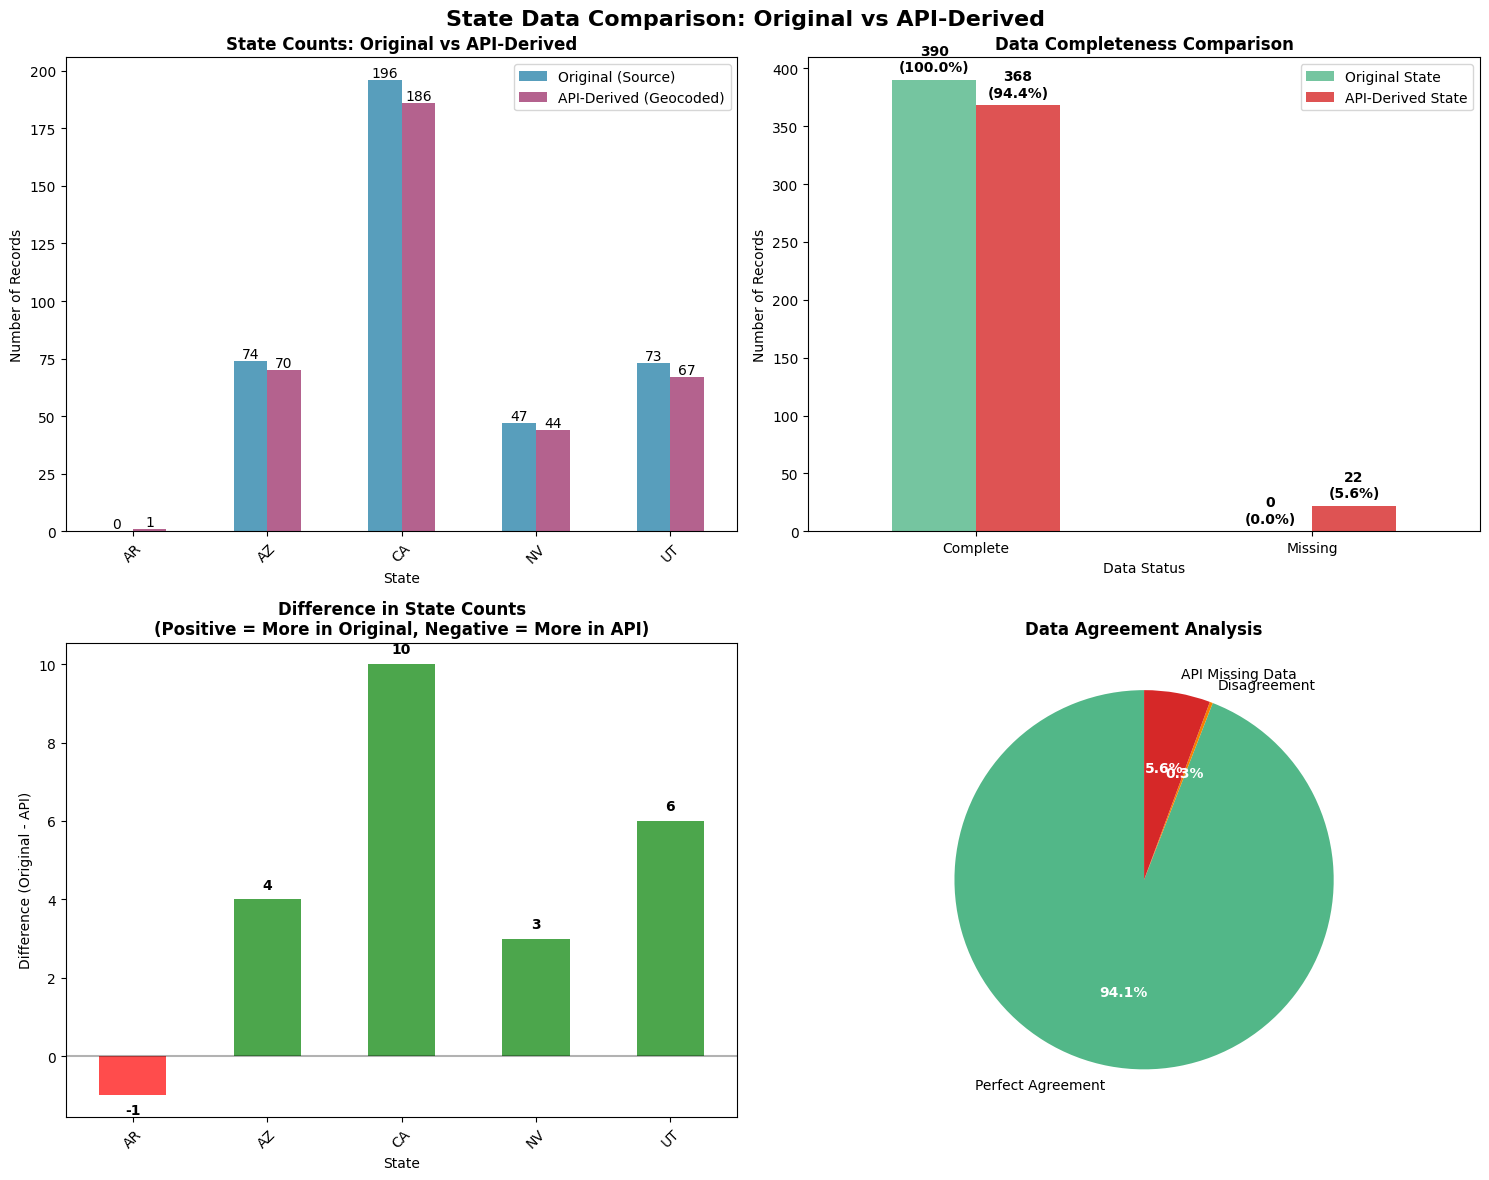


📊 SUMMARY STATISTICS TABLE
Metric                         Original     API-Derived  Difference  
------------------------------------------------------------
Total Records                  390          390          0           
Complete Records               390          368          22          
Missing Records                0            22           -22         
Unique States                  4            5            -1          
Data Completeness %            100.0%        94.4%        5.6%       

🎯 KEY INSIGHTS:
• Original state data has 100% completeness
• API-derived data has 94.4% completeness (22 missing values)
• 94.1% perfect agreement between sources
• Only 1 disagreement case found (AZ vs AR for Williams, 86046)
• API found 1 additional state (AR) not in original data
• Original data appears more reliable for state classification


: 

In [ ]:
# =================================================================
# VISUALIZATION: Original vs API-Derived State Data Comparison
# =================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('State Data Comparison: Original vs API-Derived', fontsize=16, fontweight='bold')

# 1. Bar chart comparison
state_comparison = pd.DataFrame({
    'Original (Source)': df['state'].value_counts(),
    'API-Derived (Geocoded)': df['places_state'].value_counts()
}).fillna(0)

state_comparison.plot(kind='bar', ax=ax1, color=['#2E86AB', '#A23B72'], alpha=0.8)
ax1.set_title('State Counts: Original vs API-Derived', fontweight='bold')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Records')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')

# 2. Data completeness comparison
completeness_data = {
    'Original State': [390, 0],
    'API-Derived State': [368, 22]
}
completeness_df = pd.DataFrame(completeness_data, index=['Complete', 'Missing'])
completeness_df.plot(kind='bar', ax=ax2, color=['#52B788', '#D62828'], alpha=0.8)
ax2.set_title('Data Completeness Comparison', fontweight='bold')
ax2.set_xlabel('Data Status')
ax2.set_ylabel('Number of Records')
ax2.legend()
ax2.tick_params(axis='x', rotation=0)

# Add percentage labels
for i, container in enumerate(ax2.containers):
    total = 390
    for j, bar in enumerate(container):
        height = bar.get_height()
        percentage = (height / total) * 100
        ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

# 3. Difference analysis
differences = state_comparison['Original (Source)'] - state_comparison['API-Derived (Geocoded)']
differences = differences[differences != 0]  # Only show states with differences

colors = ['red' if x < 0 else 'green' for x in differences.values]
differences.plot(kind='bar', ax=ax3, color=colors, alpha=0.7)
ax3.set_title('Difference in State Counts\n(Positive = More in Original, Negative = More in API)', fontweight='bold')
ax3.set_xlabel('State')
ax3.set_ylabel('Difference (Original - API)')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(differences.values):
    ax3.text(i, v + (0.2 if v > 0 else -0.2), str(int(v)), 
             ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

# 4. Pie chart of agreement vs disagreement
agreement_data = {
    'Perfect Agreement': 367,
    'Disagreement': 1,
    'API Missing Data': 22
}

colors_pie = ['#52B788', '#F77F00', '#D62828']
wedges, texts, autotexts = ax4.pie(agreement_data.values(), 
                                   labels=agreement_data.keys(),
                                   autopct='%1.1f%%',
                                   colors=colors_pie,
                                   startangle=90)
ax4.set_title('Data Agreement Analysis', fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n📊 SUMMARY STATISTICS TABLE")
print("=" * 60)
print(f"{'Metric':<30} {'Original':<12} {'API-Derived':<12} {'Difference':<12}")
print("-" * 60)
print(f"{'Total Records':<30} {len(df):<12} {len(df):<12} {0:<12}")
print(f"{'Complete Records':<30} {df['state'].notna().sum():<12} {df['places_state'].notna().sum():<12} {df['state'].notna().sum() - df['places_state'].notna().sum():<12}")
print(f"{'Missing Records':<30} {df['state'].isna().sum():<12} {df['places_state'].isna().sum():<12} {df['state'].isna().sum() - df['places_state'].isna().sum():<12}")
print(f"{'Unique States':<30} {df['state'].nunique():<12} {df['places_state'].nunique():<12} {df['state'].nunique() - df['places_state'].nunique():<12}")
print(f"{'Data Completeness %':<30} {(df['state'].notna().sum()/len(df)*100):.1f}%{'':<7} {(df['places_state'].notna().sum()/len(df)*100):.1f}%{'':<7} {(df['state'].notna().sum()/len(df)*100) - (df['places_state'].notna().sum()/len(df)*100):.1f}%{'':<7}")

print("\n🎯 KEY INSIGHTS:")
print("• Original state data has 100% completeness")
print("• API-derived data has 94.4% completeness (22 missing values)")
print("• 94.1% perfect agreement between sources")
print("• Only 1 disagreement case found (AZ vs AR for Williams, 86046)")
print("• API found 1 additional state (AR) not in original data")
print("• Original data appears more reliable for state classification")